## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.tv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [3]:
df[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Y']].mean()
df[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Y']].var()
df[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Y']].std()

AGE    13.109028
SEX     0.499561
BMI     4.418122
BP     13.831283
S1     34.608052
S2     30.413081
S3     12.934202
S4      1.290450
S5      0.522391
S6     11.496335
Y      77.093005
dtype: float64

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

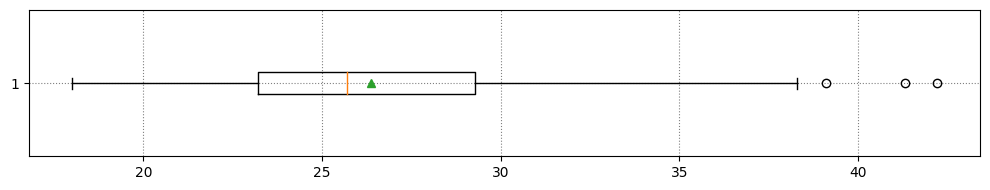

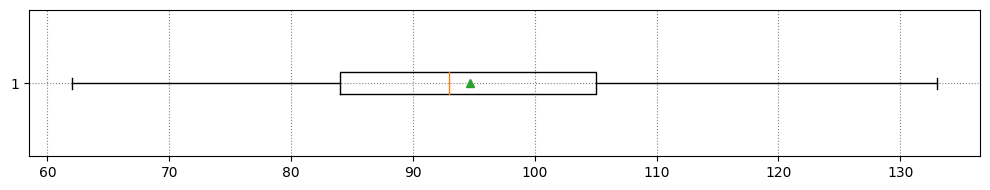

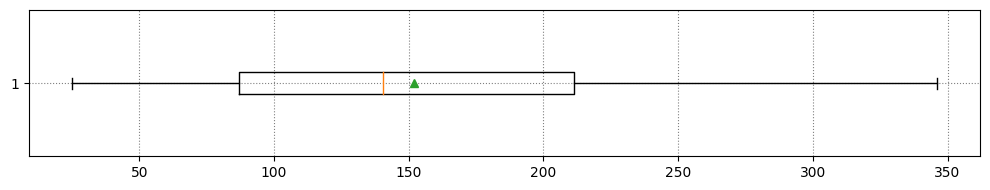

In [4]:
plt.figure(figsize=(10,2)).patch.set_facecolor('white')
plt.boxplot(df['BMI'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,2)).patch.set_facecolor('white')
plt.boxplot(df['BP'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,2)).patch.set_facecolor('white')
plt.boxplot(df['Y'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()




### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

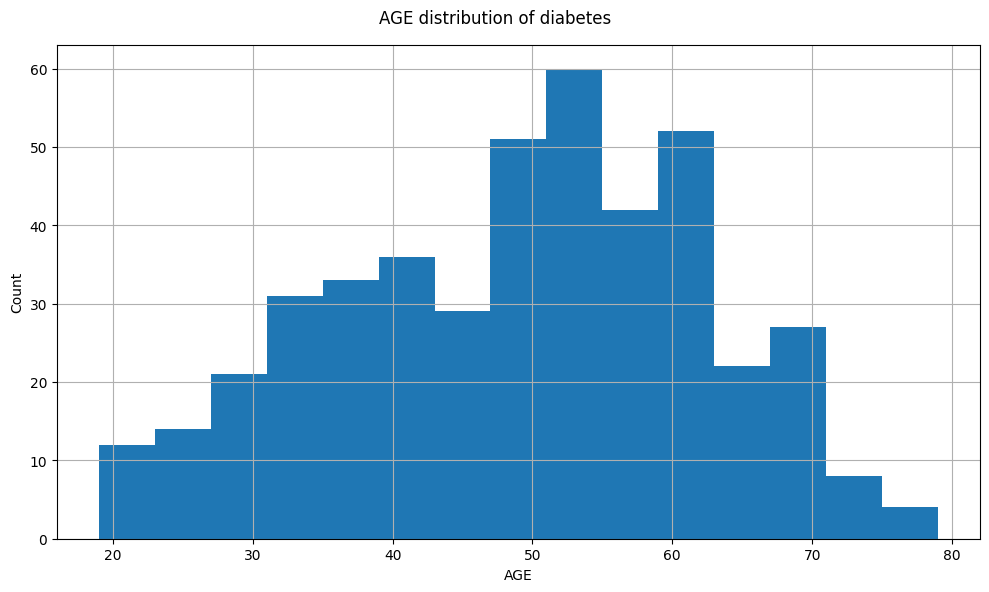

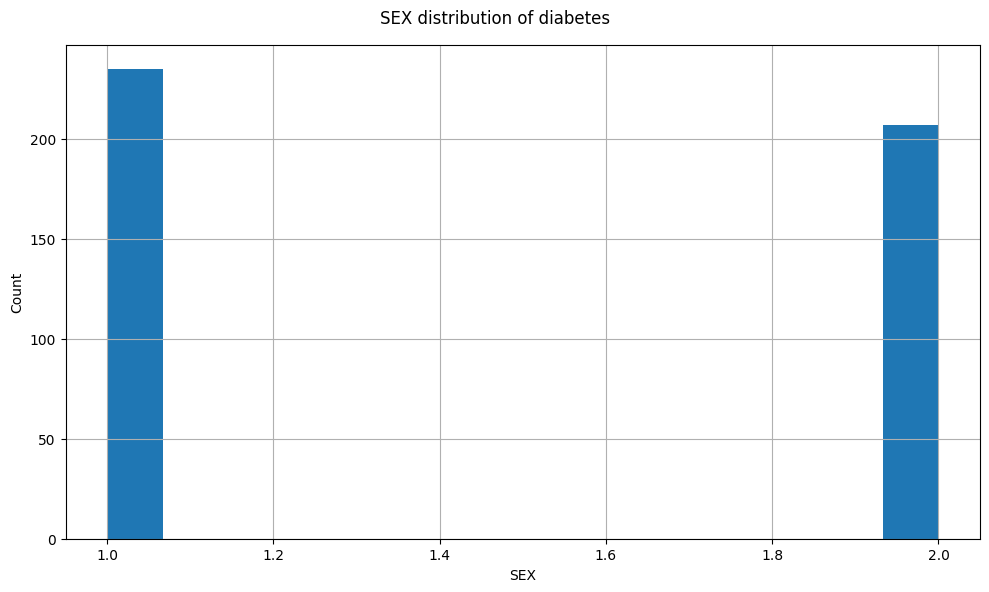

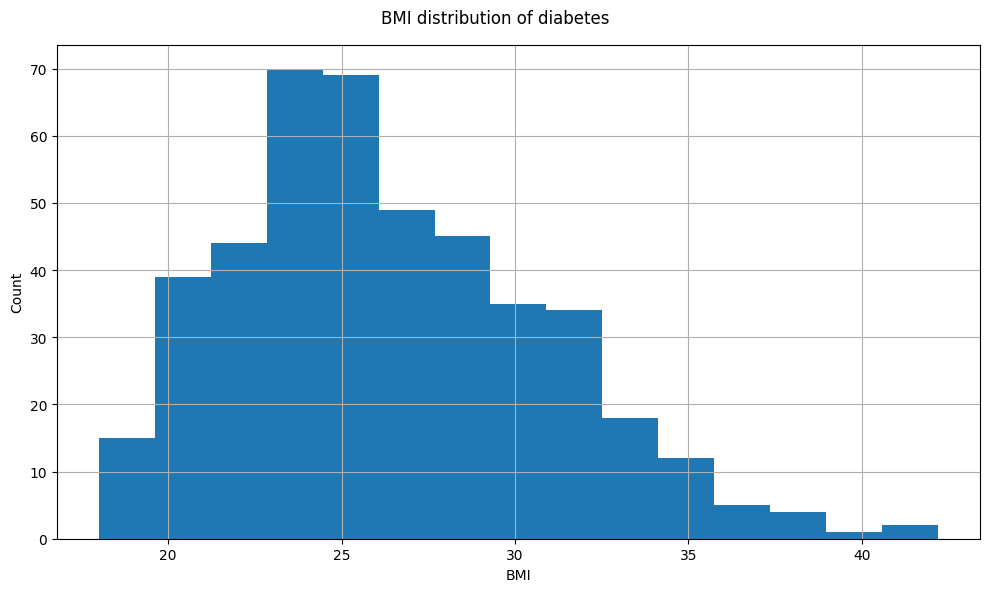

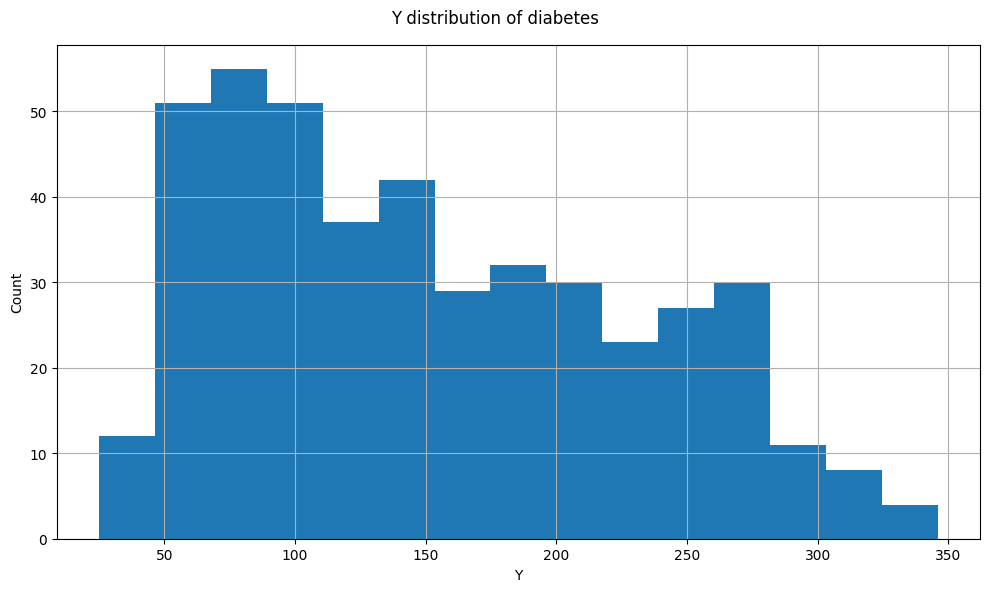

In [5]:
plt.figure().patch.set_facecolor('white')
df['AGE'].hist(bins=15, figsize=(10,6))
plt.suptitle('AGE distribution of diabetes')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure().patch.set_facecolor('white')
df['SEX'].hist(bins=15, figsize=(10,6))
plt.suptitle('SEX distribution of diabetes')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure().patch.set_facecolor('white')
df['BMI'].hist(bins=15, figsize=(10,6))
plt.suptitle('BMI distribution of diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure().patch.set_facecolor('white')
df['Y'].hist(bins=15, figsize=(10,6))
plt.suptitle('Y distribution of diabetes')
plt.xlabel('Y')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

AGE    0.187889
SEX    0.043062
BMI    0.586450
BP     0.441482
S1     0.212022
S2     0.174054
S3    -0.394789
S4     0.430453
S5     0.565883
S6     0.382483
Y      1.000000
Name: Y, dtype: float64


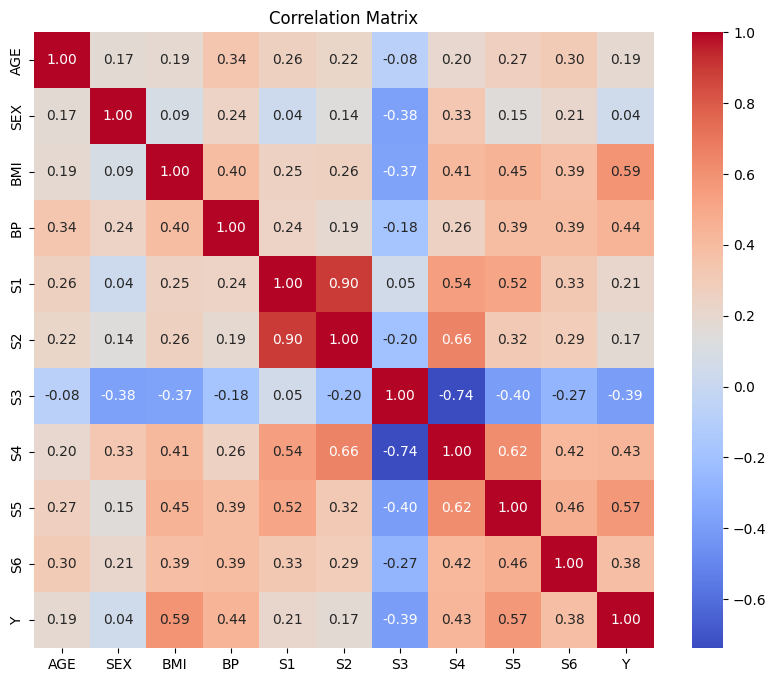

In [7]:
correlation_matrix = df.corr()
print(correlation_matrix['Y'])


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [8]:
from scipy import stats


male_data = df[df['SEX'] == 1]['Y']
female_data = df[df['SEX'] == 2]['Y']


t_stat, p_value = stats.ttest_ind(male_data, female_data)

print("t统计量:", t_stat)
print("P值:", p_value)


alpha = 0.05
if p_value < alpha:
    print("拒绝零假设：男性和女性糖尿病进展程度不同")
else:
    print("接受零假设：男性和女性糖尿病进展程度相似")

t统计量: -0.9041147550244715
P值: 0.3664292946519826
接受零假设：男性和女性糖尿病进展程度相似
